# Melanoma detection

The aim of this project is to create a deep learning model that is able to predict whether a picture of a mole is cancerous. The data I have used for this project can be found here: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

In [ ]:
!unzip archive.zip # Unzipping the folder with pictures of moles

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447

### Importing necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img



## Data preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In the step above I have normalized image pixel values so that they fall in range between 0 and 1



In [ ]:
train_generator = train_datagen.flow_from_directory('/content/data/train', target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/data/test', target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


### Displaying the train_generator images

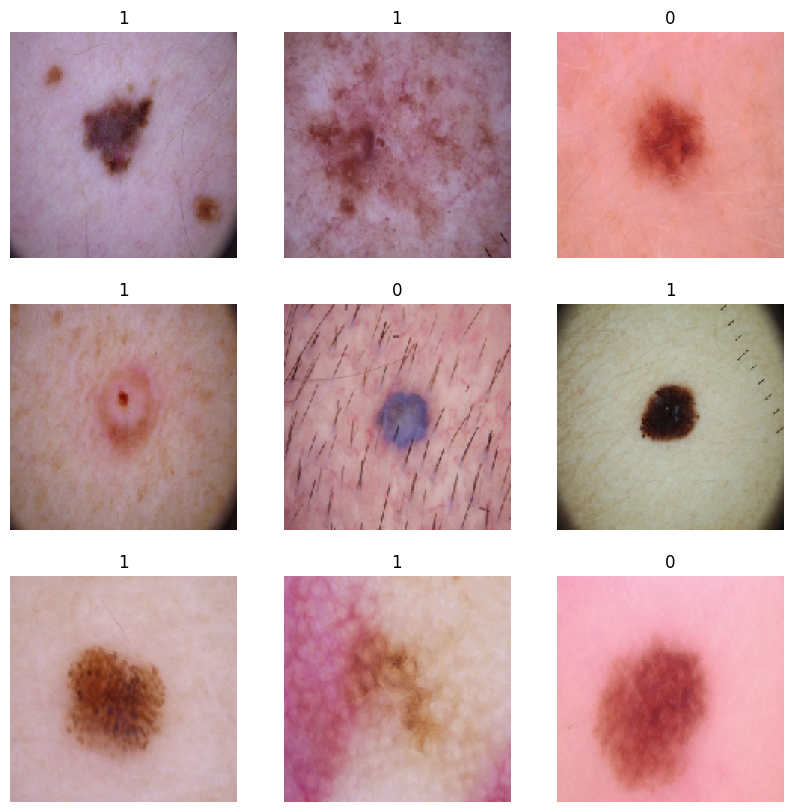

In [ ]:

for images, labels in train_generator:
    # images is a batch of images
    # labels is a batch of labels

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Displaying the first 9 images of the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")
    break


### Displaying validation_generator images

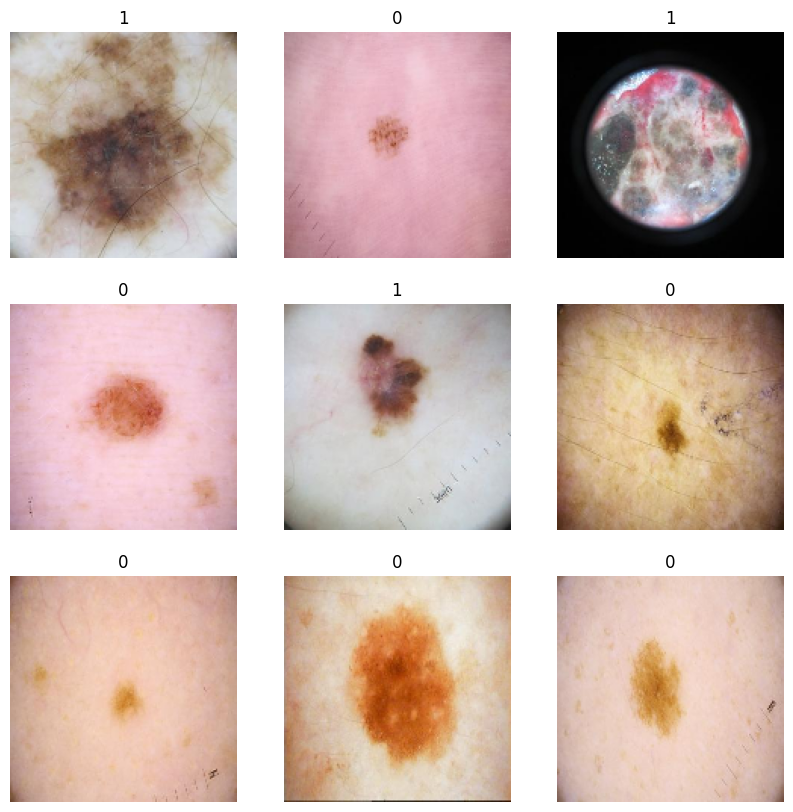

In [ ]:
for images, labels in validation_generator:
    # images is a batch of images
    # labels is a batch of labels

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Displaying the first 9 images of the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")
    break

## Model training


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 4
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # Dense layer 1
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10)


Epoch 1/10
83/83 [==============================] - 203s 2s/step - loss: 1.6772 - accuracy: 0.7565 - val_loss: 1.0284 - val_accuracy: 0.6227
Epoch 2/10
83/83 [==============================] - 195s 2s/step - loss: 0.8614 - accuracy: 0.7668 - val_loss: 6.7889 - val_accuracy: 0.4545
Epoch 3/10
83/83 [==============================] - 204s 2s/step - loss: 0.6340 - accuracy: 0.7823 - val_loss: 3.8824 - val_accuracy: 0.4636
Epoch 4/10
83/83 [==============================] - 200s 2s/step - loss: 0.4374 - accuracy: 0.8058 - val_loss: 1.1464 - val_accuracy: 0.6045
Epoch 5/10
83/83 [==============================] - 202s 2s/step - loss: 0.4128 - accuracy: 0.8134 - val_loss: 0.5620 - val_accuracy: 0.7742
Epoch 6/10
83/83 [==============================] - 200s 2s/step - loss: 0.3805 - accuracy: 0.8331 - val_loss: 1.1743 - val_accuracy: 0.7318
Epoch 7/10
83/83 [==============================] - 202s 2s/step - loss: 0.3629 - accuracy: 0.8362 - val_loss: 0.6116 - val_accuracy: 0.7303
Epoch 8/10
83

## Model evaluation

In [ ]:
class_indices = validation_generator.class_indices
print(class_indices) # Printing labels for each class so that I know which one is which

{'benign': 0, 'malignant': 1}


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
# Creating variables needed for visualization of model performance


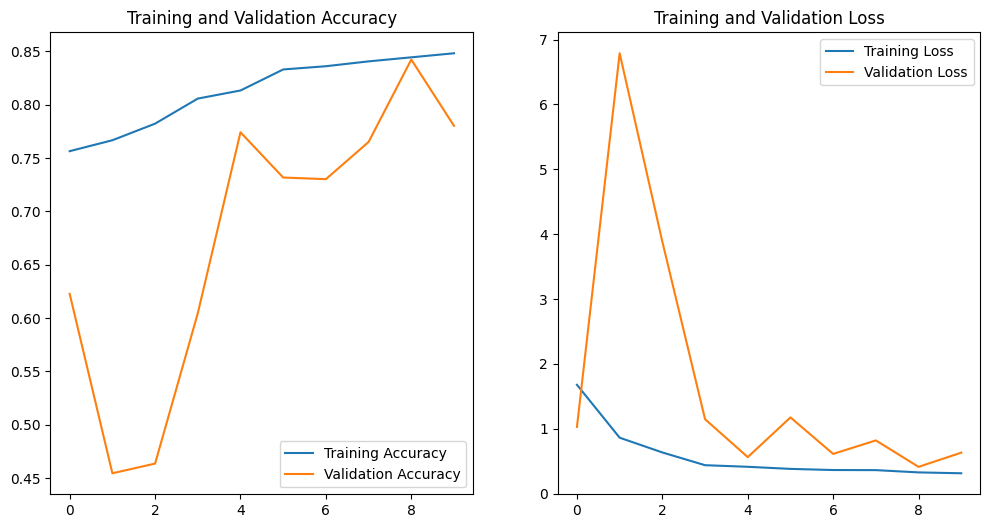

In [ ]:


# Plotting training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Here are the results of the model training. On the validation data I have gotten accuracy on a level of 78% and loss at 0.63


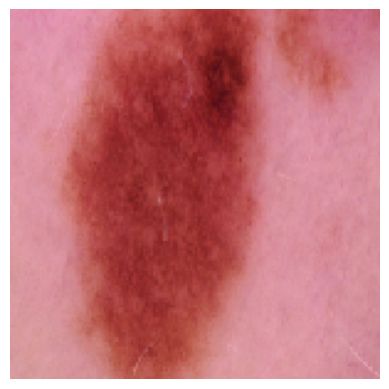

In [ ]:
# Loading a random image of a benign mole from the test data to show how the model works
image_path = '/content/test/benign/1003.jpg'
loaded_image = load_img(image_path, target_size=(150, 150))
image_array = img_to_array(loaded_image)
image_for_prediction = np.expand_dims(image_array, axis=0) / 255.0  # Normalizing the image

# Reverting the preprocessing to display the image
display_image = np.squeeze(image_for_prediction)  # Removing batch dimension
plt.imshow(display_image)
plt.axis('off')
plt.show()


In [ ]:
prediction = model.predict(image_for_prediction)
print(prediction)

1/1 [==============================] - 0s 45ms/step
[[0.00262886]]


The prediction is correct. The model predicted that for the image of benign mole there is around 0.2% for this it to be malignant.